In [166]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "/Users/vishesh/Desktop/AIproject"
df = pd.read_csv( path + "/accidents.csv" )
print ("The dataset has %d rows and %d columns" % (df.shape[0] , df.shape[1]))
df.head()

The dataset has 36314 rows and 10 columns


,wkt_geom,code,severity,time,lat,desc,lon,name,clust,NN
0,POINT(6119950.59451242536306381 1886366.970110...,201,2,04/10/13 08:00 AM,37.165655,Accident and recovery work on Bear Creek Road ...,-122.015948,Accident(s),31,11
1,POINT(6163265.98209197819232941 2195198.763392...,201,2,04/10/13 05:30 PM,38.015568,CA-4 exit ramp partially blocked due to accide...,-121.882976,Accident(s),14,3
2,POINT(6156011.13359668850898743 2064637.280291...,201,3,04/10/13 05:55 PM,37.656750,I-680 Southbound exit ramp partially blocked d...,-121.901370,Accident(s),11,52
3,POINT(6040154.25608104187995195 2127971.038348...,201,3,04/10/13 06:17 PM,37.825210,Right hand shoulder blocked due to accident on...,-122.305740,Accident(s),28,11
4,POINT(6160755.65850416570901871 2058394.601888...,243,3,04/10/13 06:19 PM,37.639801,Lane blocked due to accident on I-680 Southbou...,-121.884663,Accident. Left lane blocked,11,51


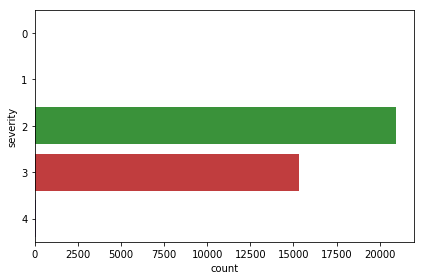

In [167]:
sns.countplot(y = "severity" , data = df )
plt.tight_layout()

In [168]:
pd.DataFrame( {"count": df["severity"].value_counts().values } , index = df["severity"].value_counts().index )

,count
2,20944
3,15296
4,54
1,19
0,1


In [169]:
df = df.loc[df["severity"] >=  0].loc[df["severity"] <= 4]

In [170]:
df["month"] = df["time"].apply(lambda x:int(x[:2]))
df["day"] = df["time"].apply(lambda x:int(x[3:5]))
df["year"] = df["time"].apply(lambda x:int(x[6:8]))
df["hour"] =  df["time"].apply(lambda x: int(x[9:11]) if str(x)[15] == 'A' else 12 + int(x[9:11])  )
df["lon"] = df["lon"].apply(lambda x:abs(x))
#so that multinomialNB works (only with positive features)
#creating the date at the datetime format (easier to deal with)
df[ "date" ]= df[["month" , "day" ,"year"]].apply(lambda x:pd.datetime(month = x['month'] , day = x['day']  , year = 2000+x["year"]), axis = 1)
df["weekday"] =  df["date"].apply(lambda x:x.weekday())

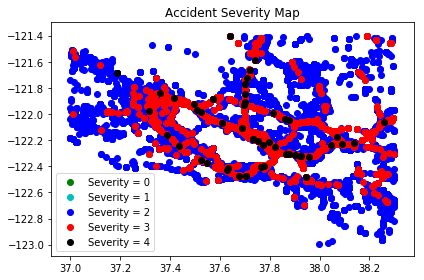

In [171]:
#plotting the dataset with a different color depending on the severity
df0 = df.loc[df["severity"] == 0]
df1 = df.loc[df["severity"] == 1]
df2 = df.loc[df["severity"] == 2]
df3 = df.loc[df["severity"] == 3]
df4 = df.loc[df["severity"] == 4]

xx0 , yy0 = df0["lat"] , -df0["lon"]
xx1 , yy1 = df1["lat"] , -df1["lon"]
xx2 , yy2 = df2["lat"] , -df2["lon"]
xx3 , yy3 = df3["lat"] , -df3["lon"]
xx4 , yy4 = df4["lat"] , -df4["lon"]

pts0 = plt.scatter(xx0,yy0,color = 'g' )
pts1 = plt.scatter(xx1,yy1,color = 'c' )
pts2 = plt.scatter(xx2,yy2,color = 'b' )
pts3 = plt.scatter(xx3,yy3,color = 'r' )
pts4 = plt.scatter(xx4,yy4,color = 'k' )

plt.legend((pts0, pts1, pts2, pts3, pts4), ('Severity = 0','Severity = 1','Severity = 2', 'Severity = 3','Severity = 4'),loc='lower left')
plt.title("Accident Severity Map")
plt.tight_layout()

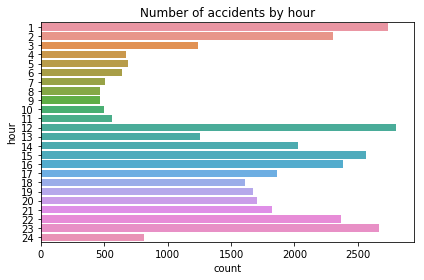

In [172]:
sns.countplot(y = "hour" , data = df , order = range(1,25))
plt.title("Number of accidents by hour")
plt.tight_layout()

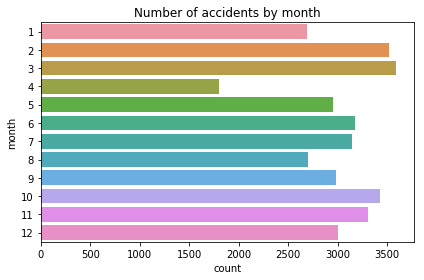

In [173]:
sns.countplot(y = "month" , data = df)
plt.title("Number of accidents by month")
plt.tight_layout()

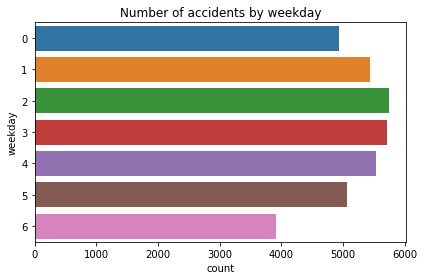

In [174]:
sns.countplot(y = "weekday" , data = df)
plt.title("Number of accidents by weekday")
plt.tight_layout()

In [175]:
df = df.loc[df["severity"] >=  0].loc[df["severity"] <= 4]
severity_by_hour = pd.crosstab(index = df["hour"] , columns = df["severity"] )
severity_by_hour = pd.DataFrame(severity_by_hour.values)
print(severity_by_hour)

    0  1     2     3  4
0   0  3  1402  1329  6
1   0  1  1283  1015  2
2   0  0   778   460  0
3   0  0   497   174  0
4   0  0   482   201  0
5   0  0   446   192  0
6   0  0   349   157  1
7   0  0   318   147  1
8   0  0   316   150  1
9   0  0   317   177  0
10  0  0   341   217  3
11  0  1  1447  1355  1
12  0  1   656   596  4
13  1  1  1132   892  2
14  0  4  1494  1060  3
15  0  1  1416   965  2
16  0  3  1123   731  3
17  0  0   982   625  3
18  0  1   993   673  6
19  0  1  1017   682  3
20  0  0  1040   778  2
21  0  2  1300  1061  4
22  0  0  1363  1301  2
23  0  0   452   358  5


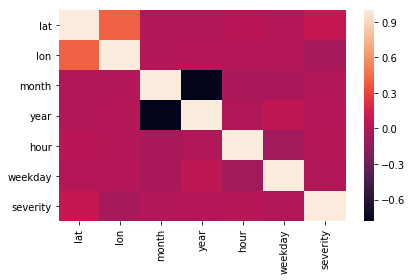

In [176]:
# correlation heatmap
df_corr = df[["lat" , "lon" , "month" , "year" , "hour" , "weekday" , "severity"]]
correlation = df_corr.corr()
sns.heatmap(correlation)
plt.tight_layout()

In [183]:
df = df.loc[df["severity"] >  1].loc[df["severity"] < 4]
X = df[["month" , "hour" , "year", "weekday" ,"lon" , "lat"]]
y = df["severity"].apply(lambda x:x-2)

from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [184]:
#using the metrics package
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
def printScores(y_test, y_pred, classif_name):    
    print ("--------------  "  + classif_name + "  ------------------")  
    print ("recall : %0.5f" %  recall_score(y_test, y_pred)) 
    print ("precision : %0.5f" %  precision_score(y_test, y_pred))   
    print ("f1 : %0.5f" %  f1_score(y_test, y_pred))  
    print ("accuracy : %0.5f" %  accuracy_score(y_test, y_pred))  
    print ("---------------------------------------------------")  

In [185]:
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [180]:
df = df.loc[df["severity"] >  1].loc[df["severity"] < 4]
X_train2 = X_train[["lat" , "lon" ]]
X_test2 = X_test[["lat" , "lon" ]]

In [293]:
# Hybrid-1

# Creation of the RandomForest Classifier
clf = RandomForestClassifier(n_estimators = 100)
# Creation of the Adaboost Classifier
abc =AdaBoostClassifier(n_estimators=10, base_estimator=clf,learning_rate=1)
# Creation of the Bagging Classifier over Adaboost
mod = BaggingClassifier(n_estimators=10, base_estimator=abc,max_samples=10,warm_start=True)
modelB = mod.fit(X_train2,y_train)
y_pred = modelB.predict(X_test2)
printScores(y_test, y_pred, "Hybrid-1") 

--------------  Hybrid-1  ------------------
recall : 0.50610
precision : 0.62862
f1 : 0.56074
accuracy : 0.66510
---------------------------------------------------


In [295]:
# Hybrid-2

# Creation of the RandomForest Classifier
clf = RandomForestClassifier(n_estimators = 500)
# Creation of the Bagging Classifier
bag = BaggingClassifier(n_estimators=20, base_estimator=clf,max_samples=1200,warm_start=True)
# Creation of the Adaboost Classifier over Bagging
mod = AdaBoostClassifier(n_estimators=75, base_estimator=bag,learning_rate=1)
modelC = mod.fit(X_train2,y_train)
y_pred = modelC.predict(X_test2)
printScores(y_test, y_pred, "Hybrid-2")

--------------  Hybrid-2  ------------------
recall : 0.95383
precision : 0.87582
f1 : 0.91317
accuracy : 0.92338
---------------------------------------------------


In [291]:
# Random forest

clf = RandomForestClassifier(n_estimators = 500)
clf.fit(X_train2,y_train)
y_pred = clf.predict(X_test2)
printScores(y_test, y_pred, "RandomForestClassifier")

--------------  RandomForestClassifier  ------------------
recall : 0.95884
precision : 0.92209
f1 : 0.94011
accuracy : 0.94840
---------------------------------------------------


In [288]:
# Adaboost Classifier

mod = AdaBoostClassifier(n_estimators=500,learning_rate=1)
modelD = mod.fit(X_train2,y_train)
y_pred = modelD.predict(X_test2)
printScores(y_test, y_pred, "Adaboost") 

--------------  Adaboost  ------------------
recall : 0.82513
precision : 0.76763
f1 : 0.79534
accuracy : 0.82064
---------------------------------------------------


In [290]:
# Bagging Classifier

mod = BaggingClassifier(n_estimators=500,max_samples=10,warm_start=True)
modelB = mod.fit(X_train2,y_train)
y_pred = modelB.predict(X_test2)
printScores(y_test, y_pred, "Bagging") 

--------------  Bagging  ------------------
recall : 0.60126
precision : 0.63442
f1 : 0.61740
accuracy : 0.68525
---------------------------------------------------
